In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import spacy

In [2]:
df = pd.read_csv(r'C:\Users\saura\Saurabh\Desktop\ML\fake_job_postings.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

In [5]:
df.isnull().sum()[df.isnull().sum()>0]

location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
dtype: int64

In [6]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [7]:
columns = ['job_id','telecommuting','has_company_logo','has_questions','salary_range','employment_type']
for col in columns:
    del df[col]

In [8]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
df.shape

(17880, 12)

In [10]:
df.fillna('',inplace=True)

In [11]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

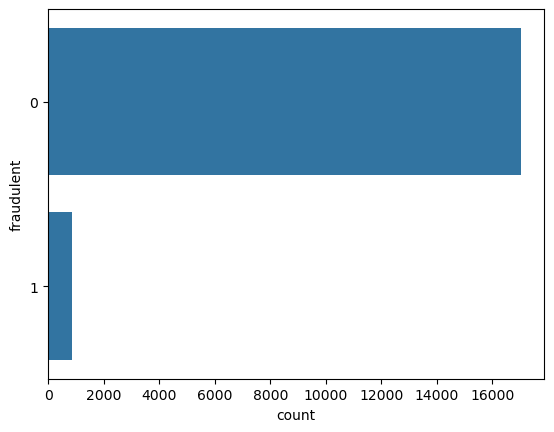

In [12]:
sns.countplot(y='fraudulent',data=df)
plt.show()

In [13]:
df.fraudulent.value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [14]:
def split(location):
    l = location.split(',')
    return l[0]
df["country"] = df.location.apply(split)

In [15]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [16]:
df['text'] = df['description'] + df['requirements'] + df['benefits']+df['title']+ df['company_profile']


In [17]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country,text
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US,"Food52, a fast-growing, James Beard Award-winn..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ,Organised - Focused - Vibrant - Awesome!Do you...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US,"Our client, located in Houston, is actively se..."
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,THE COMPANY: ESRI – Environmental Systems Rese...
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,JOB TITLE: Itemization Review ManagerLOCATION:...


In [18]:
df.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'country', 'text'],
      dtype='object')

In [19]:
del_columns = ['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function','country']
for col in del_columns:
    del df[col]

In [20]:
df.head()

,fraudulent,text
0,0,"Food52, a fast-growing, James Beard Award-winn..."
1,0,Organised - Focused - Vibrant - Awesome!Do you...
2,0,"Our client, located in Houston, is actively se..."
3,0,THE COMPANY: ESRI – Environmental Systems Rese...
4,0,JOB TITLE: Itemization Review ManagerLOCATION:...


In [21]:
df['text'] = df['text'].str.lower()
df['text']

0        food52, a fast-growing, james beard award-winn...
1        organised - focused - vibrant - awesome!do you...
2        our client, located in houston, is actively se...
3        the company: esri – environmental systems rese...
4        job title: itemization review managerlocation:...
                               ...                        
17875    just in case this is the first time you’ve vis...
17876    the payroll accountant will focus primarily on...
17877    experienced project cost control staff enginee...
17878    nemsia studios is looking for an experienced v...
17879    who are we?vend is an award winning web based ...
Name: text, Length: 17880, dtype: object

In [22]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
len(stopwords.words('english'))

198

In [24]:
stopword_list = stopwords.words('english')

In [25]:
import string 
punc_list = list(string.punctuation)

In [26]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def text_process(text):
    text = [char for char in text if char not in punc_list]
    text = ''.join(text)
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stopword_list]
    return ' '.join(words)

In [27]:
df['text'] = df['text'].apply(text_process)

In [28]:
df['text']

0        food52 fastgrowing james beard awardwinning on...
1        organised focused vibrant awesomedo passion cu...
2        client located houston actively seeking experi...
3        company esri – environmental system research i...
4        job title itemization review managerlocation f...
                               ...                        
17875    case first time you’ve visited website vend aw...
17876    payroll accountant focus primarily payroll fun...
17877    experienced project cost control staff enginee...
17878    nemsia studio looking experienced visualgraphi...
17879    wevend award winning web based point sale soft...
Name: text, Length: 17880, dtype: object

In [29]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
tfidf = TfidfVectorizer(max_features=10000)
tfidf_fitted = tfidf.fit_transform(df['text'])

In [31]:
len(tfidf.vocabulary_)

10000

In [32]:
x = tfidf.transform(df['text'])
y = df['fraudulent']


In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
y_train.value_counts()

fraudulent
0    13619
1      685
Name: count, dtype: int64

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200,random_state=42,class_weight="balanced")

In [36]:
rfc.fit(x_train,y_train )

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [37]:
test_predict = rfc.predict(x_test)

In [38]:
cm = confusion_matrix(y_test,test_predict)
cm

array([[3393,    2],
       [  80,  101]])

In [39]:
accuracy_score(y_test,test_predict)

0.977069351230425